### X Lines of Python

# Plotting a stereonet with `mplstereonet`

Robert Leckenby

This notebook goes with a blog post: [X Lines of Python: Stereonets with mplstereonet](https://agilescientific.com/blog/2021/01/12/x-lines-of-python-stereonets)

---

A few years back I needed to plot some fracture data but I didn't have any plotting software, so I created a large excel spreadsheet where I could make a polar plot and show my fracture data in an interactive fashion. You can still see this _code-fossil_ on the [banner of my linkedin profile](https://www.linkedin.com/in/robertleckenby/) and I keep it there as a reminder to improve. But thanks to [Joe Kington](https://twitter.com/joferkington) and his awesome [mplstereonet library](https://pypi.org/project/mplstereonet/) those days are over for me. So how can we make an equal area Schmidt plot with `mplstereonet`?

We'll start with the imports as usual and here I'm going to use [pandas](https://pandas.pydata.org/) to load my data and [mplstereonet](https://pypi.org/project/mplstereonet/) to make the plots:

In [1]:
import pandas as pd
import mplstereonet as mpl

## Load some data

First let's get some data, [Irene Wallis](http://www.cubicearth.nz/) has built a fantastic [fractoolbox repo](https://github.com/ICWallis/fractoolbox/) that inlcudes some [data licenced under the Apache licence 2.0](https://github.com/ICWallis/fractoolbox/blob/master/LICENSE) as well as some notebooks that go beyond what we will do here, so that's a great place to go next!

The `testdata-fractures.csv` file contains 1142 rows and 4 columns, let's load it up and inspect it. Happily, one can give a UR for a CSV straight to `pandas`:

In [2]:
fname = "https://raw.githubusercontent.com/ICWallis/fractoolbox/master/testdata-fractures.csv"
df = pd.read_csv(fname)

**Note:** If this link to the data stops working, try [this one](https://raw.githubusercontent.com/ICWallis/fractoolbox/60778d6cdd6a103c48a887e70ec19447d2c7ef76/testdata-fractures.csv) insted.

Let's check the top few lines and the statistics of my `DataFrame` just to be sure everything is as expected:

In [3]:
df.head()

depth_mMDRF  dipazimuth_deg   dip_deg       type
0  1224.559944       174.87238  78.54814  Cond_FTCC
1  1224.830215       171.09971  71.07558  Cond_FTCC
2  1225.193391       170.17670  70.48370  Cond_FTCC
3  1225.535453       168.36274  69.19910  Cond_FTCC
4  1226.063326       174.29375  72.06275  Cond_FTCC

We see we have four columns of data:
- depth_mMDRF
- dipazimuth_deg
- dip_deg
- type


## Inspect the data

We'll start with a simple description of the data:

In [4]:
df.describe()

depth_mMDRF  dipazimuth_deg      dip_deg
count  1142.000000     1142.000000  1142.000000
mean   1893.710960      268.599641    62.040696
std     269.489435       61.931356    16.288649
min    1224.559944       80.306737     5.772998
25%    1720.011095      236.575975    49.346440
50%    2029.533865      262.897500    61.315205
75%    2102.112923      282.992775    76.152855
max    2150.445427      439.629500    89.941930

This shows us the data ranges are: 5.8° to 90° for `dip_deg` and 80° to 440° for `dipazimuth_deg` (N.B.: the data have been rotated to comply with the Operator's request.). Now we can use `df.groupby('type')` with the `DataFrame.nunique()` method to see which fracture types were recorded in this CSV and how many of each there were:

In [5]:
df.groupby('type').nunique()

depth_mMDRF  dipazimuth_deg  dip_deg  type
type                                                 
Cond_FTCC          739             739      739     1
Cond_FTS           355             355      355     1
Cond_PTCC           20              20       20     1
Cond_PTS            18              18       18     1
Cond_PTT            10              10       10     1

Where the values in the `type` column have the following meaning:

- FTCC = Full trace, cross-cutting (crosses the entire image and crosses another fracture)
- FTS  = Full trace, solitary
- PTCC = Part trace, cross cutting
- PTS  = Part trace, solitary
- PTT  = Part trace, and truncates against another fracture

## Select data to plot

The next step will be to extract only those fracture types from the DataFrame that we want to plot. We can do this in Pandas with a [boolean array](https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.arrays.BooleanArray.html) where we select the rows in the `type` column where those row values are equal to `Cond_FTS` for example, and then pass a sequence of columns to `.loc` to keep only `dipazimuth_deg` and `dip_deg` and discard `type`, let's look at the `.head()` of this DataFrame to check it's what we want:

In [6]:
df.loc[df.type == 'Cond_FTS', ['dipazimuth_deg', 'dip_deg']].head()

dipazimuth_deg   dip_deg
6         257.0502  79.10287
7         256.0982  66.15125
8         208.9007  70.01725
9         235.1198  60.71380
10        214.2224  72.84662

We then use the `df.values` attribute to return an ndarray of the dips and azimuths and finally use the `.T` attribute to transpose the matrix so that we can then [unpack](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences) it to strike and dip like so in one line:

In [7]:
strike, dip = df.loc[df.type == 'Cond_FTS', ['dipazimuth_deg', 'dip_deg']].values.T

## Plot the data

Now it's time to build our plot, and add the data we want, for this we'll make use of `mpl.subplots()`. As the Docstring tells us, this is a wrapper which allows us to avoid typing this out everytime:
`fig, ax = plt.subplot(subplot_kw=dict(projection='stereonet'))`.

It will also default to an equal-area stereonet, which is what we want here, let's also add grid lines straight away so we can admire our Schmidt plot before adding data to it:

In [8]:
fig, ax = mpl.subplots()
ax.grid()

And we are now ready to plot our data with the `ax.plane()` method:

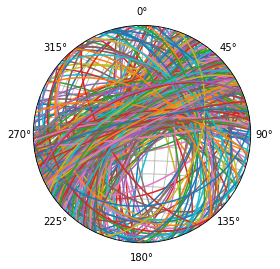

In [9]:
fig, ax = mpl.subplots()
ax.grid()

_ = ax.plane(strike, dip)

We have a lot of planes, so this is a bit hard to read; let's colour all the planes the same colour, and also thin the lines, and make them mostly transparent.

In [10]:
fig, ax = mpl.subplots()
ax.grid()

_ = ax.plane(strike, dip, color='darkred', linewidth=1, alpha=0.15)

We can also plot poles:

In [11]:
fig, ax = mpl.subplots()
ax.grid()

_ = ax.plane(strike, dip, color='darkred', linewidth=1, alpha=0.15)
_ = ax.pole(strike, dip, color='red', markersize=2)

Or we can have a density map:

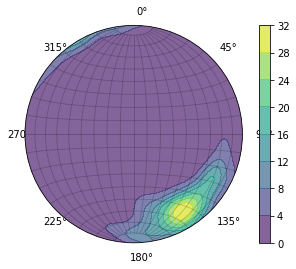

In [12]:
fig, ax = mpl.subplots()
ax.grid(color='k', alpha=0.2)

im = ax.density_contourf(strike, dip, alpha=0.67)
_ = fig.colorbar(im)

## Compare two series

Because `mplstereonet` wraps `matplotlib` we can then add text and other plot elements as you would on any other plot, so for example let's add some simple statistics for the data set we're displaying and wrap up with all the lines in one cell.

We'll also add a loop to plot two classes of fractures, `Cond_FTS` and `Cond_PTS` onto the stereonet. This will require us to pull out each class of fracture using the `DataFrame.groupby()` method. Because we're only interested in some groups, and we also want to tell `matplotlib` what colour to plot the groups, we'll make a dictionary of those we want.

We see that not counting the imports, we can make this plot with as a few as 10 lines of code:

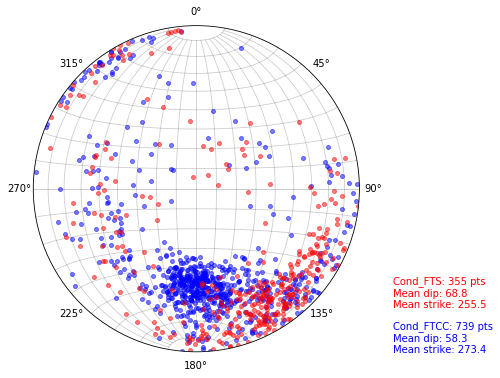

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/ICWallis/fractoolbox/master/testdata-fractures.csv")
fig, ax = mpl.subplots(figsize=(9, 6))
ax.grid(color='k', alpha=0.2)
types = {'Cond_FTS': 'red', 'Cond_FTCC': 'blue'}  # Add more classes here if you want.
for i, (typ, grp) in enumerate(df.groupby('type')):
    if typ not in types: continue
    strike, dip = grp.dipazimuth_deg, grp.dip_deg
    ax.pole(strike, dip, color=types[typ], markersize=4, alpha=0.5)
    note = f"{typ}: {dip.size} pts\nMean dip: {dip.mean():.1f}\nMean strike: {strike.mean():.1f}"
    ax.annotate(note, xy=(5*72, i*45), color=types[typ], xycoords='axes points')

And that concludes this xlines of python demo, thanks to [Joe Kington][0] and his awesome [mplstereonet library][1] and to [Irene Wallis][2] for creating and sharing the [fractoolbox repo][3]. I hope many of you will find this blog post and those repos useful.

[0]: https://twitter.com/joferkington
[1]: https://pypi.org/project/mplstereonet/
[2]: http://www.cubicearth.nz/
[3]: https://github.com/ICWallis/fractoolbox

<hr style="border:1px solid gray"> </hr>

### Extending the basic plot to an interactive stereoplot

If you'd like to extend this in such a way that you can:

- choose any one of the different fracture `types`
- change the opacity (`alpha` parameter) of the planes (which you might want to do if you have too many data)
- show poles to planes
- plot an Orientation density distribution map on the stereonet

you can do all this thanks to `mplstereonet` and `ipywidgets`. We need to make some more imports, first we'll need `inset_axes` to show the legend for the orientation density map, and then we'll need to import `interact` and `widgets` from `ipyidgets`:

In [14]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from ipywidgets import interact, widgets

We can now build up the plotting function which builds on what was shown above. The function content is the same, but we have to add some `if` statements to toggle the widgets, and we use an `@interact` decorator on the function to control the interactive plot.

In [15]:
@interact(diptype=['Cond_PTT', 'Cond_PTS', 'Cond_PTCC', 'Cond_FTS', 'Cond_FTCC'],
          alpha=widgets.FloatSlider(value=0.4, min=0, max=1, step=0.05, continuous_update=False), 
          poles=False,
          show_mean=False,
          density=False,
         )
def plot_data(diptype, alpha, poles, show_mean, density):
    """
    Plot a stereonet of image data.

    Args:
        diptype, alpha, poles, show_mean, density
        
    Returns:
        None
    """
    # Set up the plot.
    fig, ax = mpl.subplots(figsize=(6,6))
    ax.grid(color='k', alpha=0.2)
    
    # Plot data.
    strike, dip = df.loc[df.type == diptype, ('dipazimuth_deg', 'dip_deg')].values.T
    
    # Plot decoration.
    data_count, mean_azim, mean_dip = strike.shape[0], strike.mean(), dip.mean()
    ax.text(0, 10, f'N points:{data_count:12.0f}\nmean Azim:{mean_azim:8.1f}\nmean Dip:{mean_dip:12.1f}')
    
    # Add options.
    if poles:
        ax.pole(strike, dip, 'g.', markersize=3, alpha=1)
    else:
        ax.plane(strike, dip, 'g-', linewidth=1, alpha=alpha)
    
    if show_mean:
        ax.plane(mean_azim, mean_dip, 'r--', lw=3, alpha=0.7)
        ax.pole(mean_azim, mean_dip, 'rs', markersize=5, alpha=0.7)

    if density:
        im = ax.density_contourf(strike, dip, measurement='poles', alpha=0.3)
        axins = inset_axes(ax,
                   width="5%",
                   height="45%",
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
        cbar = fig.colorbar(im, cax=axins)
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel('Orientation density distribution', rotation=90)

    return None

interactive(children=(Dropdown(description='diptype', options=('Cond_PTT', 'Cond_PTS', 'Cond_PTCC', 'Cond_FTS'…

---

&copy; 2021 Agile Scientific, licensed CC-BY